# For viewing the classification metrics and creating plots

# TODO: cell 30 data aggregation...

In [1]:
# imports
import pandas as pd
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import display_html # https://www.thetopsites.net/article/50899244.shtml
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [4]:
# data_pth='/mnt/g/Planet/project_data/classification_stats_x4_400000_global_valid_mod.csv'
# data_pth='/mnt/g/Planet/project_data/classification_stats_x4_400000_shield2_hold_mod_first2k.csv'
# data_pth='/mnt/g/Planet/project_data/classification_stats_x10_local-masked_400000_tmp_1k.csv'
data_pth='/mnt/g/Planet/project_data/classification_stats_x10_local-masked_400000_2k_combined.csv'

data=pd.read_csv(data_pth)
del data['Unnamed: 0']
data.head()

,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
0,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0,SR,8.512153,201.99965,215.0,0.981379,3,255
1,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0,HR,8.506076,207.88528,222.0,NaN,12,255
2,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0,LR,8.637153,207.84766,222.0,NaN,18,255
3,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0,Bic,8.746528,207.83630,222.0,0.969385,8,255
4,1,20170708_181118_102a_3B_AnalyticMS_SR_s0175,0,SR,16.425347,203.24974,232.0,0.974029,17,255


## Now, filter data by image, threshold, and/or resolution

In [5]:
display(data.shape)
data.describe()

(8520, 10)

,num,thresh,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
count,8520.000000,8520.0,8520.000000,8520.000000,8520.00000,4254.000000,8520.000000,8520.000000
mean,1064.500000,0.0,25.422344,179.488347,197.87770,0.963203,17.591197,254.094718
std,614.914056,0.0,21.282928,44.878384,65.19073,0.056458,13.534430,13.120356
min,0.000000,0.0,0.000000,6.350768,1.00000,0.005591,0.000000,27.000000
25%,532.000000,0.0,10.633681,164.147423,205.00000,0.962379,8.000000,255.000000
50%,1064.500000,0.0,18.426649,193.678285,223.00000,0.974627,16.000000,255.000000
75%,1597.000000,0.0,32.987739,209.177797,233.00000,0.982472,25.000000,255.000000
max,2129.000000,0.0,99.878906,240.552080,255.00000,0.996135,193.000000,255.000000


In [6]:
# filter to verifiy number of images
data[['num','res','thresh','kappa']].head()
print(f'Number of images: {data.num.unique().size}')

Number of images: 2130


In [7]:
    # filter out rows with all or no water # uncomment to use # TODO: note this is buggy and results in uneven numbers of obs for each resolution...
# print(len(data))
# data=data[(data.percent_water>0) & (data.percent_water<100)]
# print(len(data))

In [8]:
# cross-tabulate and looks at summary stats
data.groupby(['res','thresh']).describe()
group1=data[['num', 'res','thresh','percent_water','median_ndwi','kappa']].groupby(['res','thresh']).mean()
del group1['num']
group1
# data[['res','thresh','kappa']].groupby(['res']).describe(percentiles=[0.5]) # groupby ,'thresh' as well

,,percent_water,median_ndwi,kappa
res,thresh,,,
Bic,0,25.454658,198.636385,0.959795
HR,0,25.394200,198.464789,NaN
LR,0,25.436819,198.677934,NaN
SR,0,25.403698,195.731690,0.966612


## revisiting

In [9]:
# This works!
# reset index, then unstack https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html

# dataW=data.reset_index(['num','thresh'])
# data.reindex(index=['num','thresh'])
dataW=data.set_index(['thresh', 'res','num',])
del dataW['name']
dataW
# dataW.unstack(level=1,)
# dataW

percent_water  mean_ndwi  median_ndwi     kappa  min_ndwi  \
thresh res num                                                               
0      SR  0          8.512153  201.99965        215.0  0.981379         3   
       HR  0          8.506076  207.88528        222.0       NaN        12   
       LR  0          8.637153  207.84766        222.0       NaN        18   
       Bic 0          8.746528  207.83630        222.0  0.969385         8   
       SR  1         16.425347  203.24974        232.0  0.974029        17   
...                        ...        ...          ...       ...       ...   
       Bic 2128       7.195312  201.14601        208.0  0.927275        12   
       SR  2129      10.691406  203.08470        213.0  0.943712        13   
       HR  2129      10.440104  208.26823        219.0       NaN        26   
       LR  2129      10.112847  208.19705        219.0       NaN        35   
       Bic 2129      10.233507  208.19495        219.0  0.946381        28   

                 max_ndwi  
thresh res num             
0      SR  0          255  
       HR  0          255  
       LR  0          255  
       Bic 0          255  
       SR  1          255  
...                   ...  
       Bic 2128       255  
       SR  2129       255  
       HR  2129       255  
       LR  2129       255  
       Bic 2129       255  

[8520 rows x 6 columns]

/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  


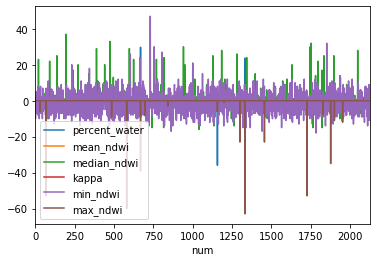

In [10]:
# explore
# dataW['mean_ndwi'][0][-0.10]['SR']
# dataW['mean_ndwi'][0][-0.10]
dataW[-2:]
(dataW.loc[(0, 'Bic')]-dataW.loc[(0, 'HR')]).min_ndwi
(dataW.loc[(0, 'Bic')]-dataW.loc[(0, 'HR')]).plot()

/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


,,,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
res,thresh,num,,,,,,
SR,0,0,8.512153,201.99965,215.0,0.981379,3,255
HR,0,0,8.506076,207.88528,222.0,NaN,12,255
LR,0,0,8.637153,207.84766,222.0,NaN,18,255
Bic,0,0,8.746528,207.83630,222.0,0.969385,8,255
SR,0,1,16.425347,203.24974,232.0,0.974029,17,255
...,...,...,...,...,...,...,...,...
Bic,0,2128,7.195312,201.14601,208.0,0.927275,12,255
SR,0,2129,10.691406,203.08470,213.0,0.943712,13,255
HR,0,2129,10.440104,208.26823,219.0,NaN,26,255


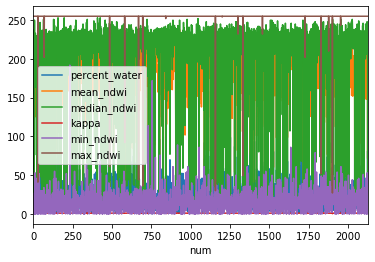

In [11]:
# plot another way
dataW1=data.set_index(['res','thresh','num',])
del dataW1['name']
(dataW1.loc[('Bic', 0)]).plot()
# plt.plot()
display(dataW1)
# dataW1.mean()

In [12]:
dataW1.count()

percent_water    8520
mean_ndwi        8520
median_ndwi      8520
kappa            4254
min_ndwi         8520
max_ndwi         8520
dtype: int64

In [13]:
# replicate plots from first paper - test
dataW1
group1.RMSE=[np.nan]
group1
# meanSq=metrics.mean_squared_error(dataW1)
dataW1.loc[('HR', 0)].percent_water
print('RMSE', (metrics.mean_squared_error(dataW1.loc[('HR', 0)].percent_water, dataW1.loc[('SR', 0)].percent_water))**0.5)
print('MAE', metrics.mean_absolute_error(dataW1.loc[('HR', 0)].percent_water, dataW1.loc[('SR', 0)].percent_water))

RMSE 1.1290463514394942
MAE 0.21690038962629105


/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [14]:
group1.index.levels[1]
group1.loc[('Bic', 0)]
group1['p_water_rmse']=np.nan
group1['p_water_mae']=np.nan
group1['p_water_cov']=np.nan
group1['p_water_mean_dev']=np.nan
group1.head(5)

,,percent_water,median_ndwi,kappa,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,
Bic,0,25.454658,198.636385,0.959795,NaN,NaN,NaN,NaN
HR,0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN
LR,0,25.436819,198.677934,NaN,NaN,NaN,NaN,NaN
SR,0,25.403698,195.731690,0.966612,NaN,NaN,NaN,NaN


In [15]:
dataW1.count()

percent_water    8520
mean_ndwi        8520
median_ndwi      8520
kappa            4254
min_ndwi         8520
max_ndwi         8520
dtype: int64

In [16]:
# repeat in loop to save data vals for plotting
group1
for i in group1.index.levels[0]: # res
    for j in group1.index.levels[1]: # thresh
#         print(i)
        if i == 'HR':
            group1.loc[(i, j)].p_water_rmse, group1.loc[(i, j)].p_water_mae, group1.loc[(i, j)].p_water_mean_dev, group1.loc[(i, j)].p_water_mean_dev = (np.nan, np.nan, np.nan,np.nan)
        else:
            group1.loc[(i, j)].p_water_rmse=(metrics.mean_squared_error(dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water))**0.5
            group1.loc[(i, j)].p_water_mae=metrics.mean_absolute_error(dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water)
            group1.loc[(i, j)].p_water_cov=np.cov(pd.DataFrame(data=[dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water]))[0,1]
            group1.loc[(i, j)].p_water_mean_dev=group1.loc[('HR', j)].percent_water-group1.loc[(i, j)].percent_water
        
group1

/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Rem

,,percent_water,median_ndwi,kappa,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,
Bic,0,25.454658,198.636385,0.959795,1.229084,0.291117,452.895096,-0.060458
HR,0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN
LR,0,25.436819,198.677934,NaN,0.915515,0.299729,452.983165,-0.042620
SR,0,25.403698,195.731690,0.966612,1.129046,0.216900,454.678906,-0.009498


Thres: 0 
group:



,,percent_water,median_ndwi,kappa,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,
Bic,0,25.454658,198.636385,0.959795,1.229084,0.291117,452.895096,-0.060458
HR,0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN
LR,0,25.436819,198.677934,NaN,0.915515,0.299729,452.983165,-0.042620
SR,0,25.403698,195.731690,0.966612,1.129046,0.216900,454.678906,-0.009498


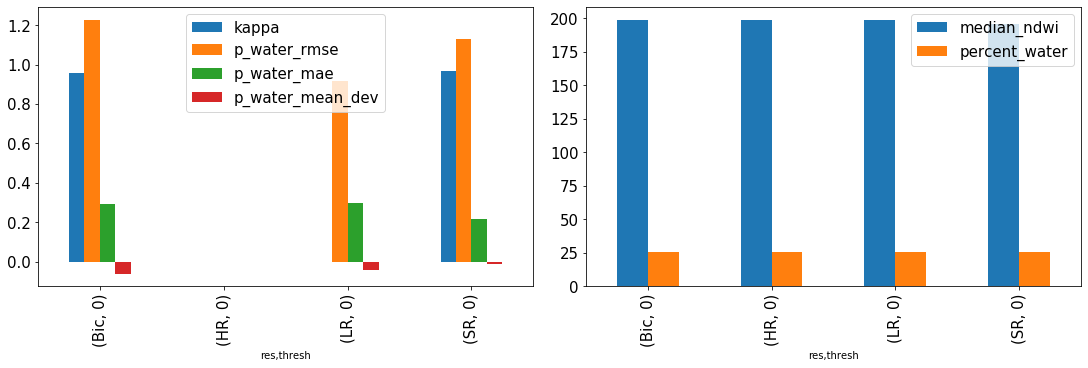

In [17]:
# groupby, then plot

group11=group1.groupby(level='thresh', squeeze=True)

    # plot options
fs =15 # font size

# group11 =group1.reset_index()
# group11.groupby(['res', 'thresh']).mean()
# fig, ax = plt.subplots(len(group1.index.levels[0]),1)
k=0 # init
# group11.set_index(['thresh','res'])
for thresh, res in group11:
    print('Thres:', thresh, '\ngroup:\n')
#     print('Res:', res, '\ngroup:\n')
    display(res.head(20))
#     ax[k].bar(res)
#     plt.subplot(len(group1.index.levels[0]),1,k+1)

        # uncomment for various plots:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
#     res[['percent_water'	,'median_ndwi'	,'kappa',	'p_water_rmse',	'p_water_mae',		'p_water_mean_dev']].plot.bar(subplots=False) # rm cov
    res[['kappa',	'p_water_rmse',	'p_water_mae',		'p_water_mean_dev']].plot.bar(subplots=False, ax=axs[0], fontsize=fs) # rm cov
    res[['median_ndwi', 'percent_water']].plot.bar(subplots=False, ax=axs[1], fontsize=fs)
    for j in range(len(axs)): axs[j].legend(fontsize=fs)
    k+=1

# Scratch paper

In [13]:
# get one image per line

df1=data[['num','res','kappa']][data.res=='Bic'].groupby(['num', 'res']).mean() # .loc[:100]
df2=data[['num','res','kappa']][data.res=='SR'].groupby(['num', 'res']).mean() # .loc[:100]
display(df1)
display(df2)
# display_side_by_side(df1,df2)

,,kappa
num,res,
0,Bic,0.943688
1,Bic,NaN
2,Bic,NaN
3,Bic,0.447292
4,Bic,0.293757
...,...,...
18492,Bic,0.761021
18493,Bic,0.456500
18494,Bic,0.864627


,,kappa
num,res,
0,SR,0.890319
1,SR,NaN
2,SR,NaN
3,SR,0.672183
4,SR,0.310908
...,...,...
18492,SR,0.771721
18493,SR,0.781841
18494,SR,0.820321


In [8]:
# aggregate?
data[data.res=='HR'].groupby('num').head()

,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
1,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.10,HR,74.950521,0.262562,0.316456,NaN,-0.992188,0.962264
5,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.05,HR,73.470052,0.262562,0.316456,NaN,-0.992188,0.962264
9,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,0.00,HR,59.705729,0.262562,0.316456,NaN,-0.992188,0.962264
13,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,0.05,HR,58.911458,0.262562,0.316456,NaN,-0.992188,0.962264
17,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,0.10,HR,58.022135,0.262562,0.316456,NaN,-0.992188,0.962264
...,...,...,...,...,...,...,...,...,...,...
517889,18496,20190828_185528_20_106b_3B_AnalyticMS_SR_s0184,-0.10,HR,70.073785,-0.287540,0.000000,NaN,-0.992188,0.974683
517893,18496,20190828_185528_20_106b_3B_AnalyticMS_SR_s0184,-0.05,HR,70.062500,-0.287540,0.000000,NaN,-0.992188,0.974683
517897,18496,20190828_185528_20_106b_3B_AnalyticMS_SR_s0184,0.00,HR,0.644965,-0.287540,0.000000,NaN,-0.992188,0.974683
517901,18496,20190828_185528_20_106b_3B_AnalyticMS_SR_s0184,0.05,HR,0.633247,-0.287540,0.000000,NaN,-0.992188,0.974683


In [9]:
bic=data[data.res=='Bic'].groupby(['num']).mean() # .loc[:100]
sr=data[data.res=='SR'].groupby(['num']).mean() # .loc[:100]
bic.head()

,thresh,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
num,,,,,,,
0,0.071429,62.845300,0.268765,0.333333,0.943688,-1.000000,1.000000
1,0.071429,0.000000,-0.938394,-0.986486,NaN,-1.000000,-0.300310
2,0.071429,100.000000,0.931091,0.931034,NaN,0.909091,0.944444
3,0.071429,1.694196,-0.311738,-0.252747,0.447292,-0.935829,0.295775
4,0.071429,5.704427,-0.645122,-0.783133,0.293757,-1.000000,1.000000


In [10]:
# try again # this shows how kappa fares for SR compared to Bic
data[['num', 'res','thresh','percent_water','median_ndwi','kappa']][:200].groupby(['thresh','num'], axis ='rows').mean()

percent_water  median_ndwi     kappa
thresh num                                      
-0.10  0        73.791450     0.324352  0.924278
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         9.438585    -0.252739  0.830494
       4        16.701931    -0.786208  0.925459
       5        17.449761    -0.209189  0.798443
       6         0.161024    -0.744181  0.715410
       7         6.690972    -0.941192  0.730980
-0.05  0        72.353299     0.324352  0.922333
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         3.225369    -0.252739  0.737248
       4        16.663520    -0.786208  0.926373
       5         7.401042    -0.209189  0.764505
       6         0.109375    -0.744181  0.672768
 0.00  0        60.829210     0.324352  0.931224
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         0.844727    -0.252739  0.608504
       4         0.796658    -0.786208  0.069593
       5         1.219293    -0.209189  0.621095
       6         0.064236    -0.744181  0.647543
 0.05  0        60.042860     0.324352  0.930150
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         0.286241    -0.252739  0.505469
       4         0.793186    -0.786208  0.062818
       5         0.079970    -0.209189  0.546534
       6         0.026801    -0.744181  0.426386
 0.10  0        59.162326     0.324352  0.927139
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         0.109375    -0.252739  0.505945
       4         0.790473    -0.786208  0.058507
       5         0.004232    -0.209189  0.102531
       6         0.007812    -0.744181  0.261855
 0.20  0        56.659722     0.324352  0.905255
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         0.030707    -0.252739  0.524193
       4         0.779948    -0.786208  0.039121
       5         0.000000    -0.209189       NaN
       6         0.000000    -0.744181       NaN
 0.30  0        51.770399     0.324352  0.878645
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         0.006836    -0.252739  0.206310
       4         0.774089    -0.786208  0.034457
       5         0.000000    -0.209189       NaN
       6         0.000000    -0.744181       NaN

In [11]:
# manual selection
data2=data[(data.res=='SR') & (data.thresh==0)] #.set_index(['num', 'res'])
data2
# df2.groupby(level=df2.index.names.difference(['B']))
# df2.index.names.difference(['num'])
data2.groupby('num').mean() #level='num'
data2

,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
8,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,0.0,SR,61.066406,0.223086,0.314286,0.917016,-1.000000,1.000000
36,1,20200105_150918_94_106e_3B_AnalyticMS_SR_s0178,0.0,SR,0.000000,-0.945568,-0.989418,NaN,-1.000000,-0.202381
64,2,20190816_064825_98_105e_3B_AnalyticMS_SR_s0063,0.0,SR,100.000000,0.844524,0.840000,NaN,0.500000,1.000000
92,3,20200222_035046_40_1067_3B_AnalyticMS_SR_s0680,0.0,SR,1.157986,-0.311281,-0.251852,0.687984,-1.000000,0.500000
120,4,20200530_134932_35_1063_3B_AnalyticMS_SR_s0334,0.0,SR,0.687500,-0.663255,-0.791209,0.101577,-1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
517784,18492,20190921_103716_15_105e_3B_AnalyticMS_SR_s0108,0.0,SR,10.208767,-0.436014,-0.511905,0.862498,-1.000000,0.769231
517812,18493,20190910_034015_47_1058_3B_AnalyticMS_SR_s0301,0.0,SR,0.036024,-0.869363,-0.909091,0.860712,-1.000000,1.000000
517840,18494,20191001_054635_06_1060_3B_AnalyticMS_SR_s0116,0.0,SR,84.580295,0.094058,0.105740,0.811701,-0.326861,1.000000
517868,18495,20190911_080109_58_1063_3B_AnalyticMS_SR_s0172,0.0,SR,96.505208,0.500992,0.692308,0.417782,-0.112903,1.000000


In [196]:
# groupby /aggregate selection # not what I want because
data2=data[(data.res=='SR')] #.set_index(['num', 'res']) #  (data.thresh==0)
data2
# df2.groupby(level=df2.index.names.difference(['B']))
# df2.index.names.difference(['num'])
data2.groupby('num').aggregate(['mean'], axis='rows') # axis doesn't matter for aggregate here # HERE
# data2.groupby('num').head()

,thresh,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
,mean,mean,mean,mean,mean,mean,mean
num,,,,,,,
0,0.071429,61.027220,0.223086,0.314286,0.890319,-1.000000,1.000000
1,0.071429,0.000000,-0.945568,-0.989418,NaN,-1.000000,-0.202381
2,0.071429,100.000000,0.844524,0.840000,NaN,0.500000,1.000000
3,0.071429,2.345362,-0.311281,-0.251852,0.672183,-1.000000,0.500000
4,0.071429,4.844742,-0.663255,-0.791209,0.310908,-1.000000,1.000000
...,...,...,...,...,...,...,...
18492,0.071429,7.905072,-0.436014,-0.511905,0.771721,-1.000000,0.769231
18493,0.071429,0.030196,-0.869363,-0.909091,0.781841,-1.000000,1.000000


In [26]:
    # wide to long format # https://chrisalbon.com/python/data_wrangling/pandas_long_to_wide/
# data.pivot(index='num', columns=['thresh', 'res'], values=['kappa', 'mean_ndwi'])
data.head(5)
# group2=data[['num', 'res','thresh','percent_water','median_ndwi','kappa']].groupby(['thresh'])
# group2.mean()
# data.pivot(index='num', columns='res', values=['kappa', 'mean_ndwi'])


,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
0,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.10,SR,70.671007,0.223086,0.314286,0.874314,-1.000000,1.000000
1,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.10,HR,74.950521,0.262562,0.316456,NaN,-0.992188,0.962264
2,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.10,LR,74.847222,0.268688,0.333333,NaN,-1.000000,1.000000
3,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.10,Bic,74.697049,0.268765,0.333333,0.974241,-1.000000,1.000000
4,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.05,SR,69.250000,0.223086,0.314286,0.872888,-1.000000,1.000000


In [345]:
# crosstab
# pd.crosstab(titanic.survived, titanic['class'])
pd.crosstab(data.res, data.thresh)

thresh,-0.10,-0.05,0.00,0.05,0.10,0.20,0.30
res,,,,,,,
Bic,18497,18497,18497,18497,18497,18497,18497
HR,18497,18497,18497,18497,18497,18497,18497
LR,18497,18497,18497,18497,18497,18497,18497
SR,18497,18497,18497,18497,18497,18497,18497


In [ ]:
# aggregate - doesn't work as inteneded
group1
# group1.aggregate('mean', axis=0)
data.aggregate('mean', axis=0)

In [30]:
# pivot! # need to aggregate num by res so that index is unique
# dataW.pivot(index=['num', 'res'], columns='thresh', values=['kappa'])
dataP=data.pivot(columns='thresh', values=['kappa', 'mean_ndwi', 'num', 'res'])
dataP.head(30)

# group1
# data
# dataW

kappa                                                              \
thresh     -0.10     -0.05      0.00      0.05      0.10      0.20      0.30   
0       0.874314       NaN       NaN       NaN       NaN       NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       0.974241       NaN       NaN       NaN       NaN       NaN       NaN   
4            NaN  0.872888       NaN       NaN       NaN       NaN       NaN   
5            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
7            NaN  0.971779       NaN       NaN       NaN       NaN       NaN   
8            NaN       NaN  0.917016       NaN       NaN       NaN       NaN   
9            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11           NaN       NaN  0.945431       NaN       NaN       NaN       NaN   
12           NaN       NaN       NaN  0.915825       NaN       NaN       NaN   
13           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
14           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
15           NaN       NaN       NaN  0.944475       NaN       NaN       NaN   
16           NaN       NaN       NaN       NaN  0.911945       NaN       NaN   
17           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
18           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
19           NaN       NaN       NaN       NaN  0.942332       NaN       NaN   
20           NaN       NaN       NaN       NaN       NaN  0.884306       NaN   
21           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
23           NaN       NaN       NaN       NaN       NaN  0.926204       NaN   
24           NaN       NaN       NaN       NaN       NaN       NaN  0.855937   
25           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
26           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
27           NaN       NaN       NaN       NaN       NaN       NaN  0.901352   
28           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
29           NaN       NaN       NaN       NaN       NaN       NaN       NaN   

       mean_ndwi                      ...   num               res              \
thresh     -0.10     -0.05      0.00  ...  0.10  0.20  0.30 -0.10 -0.05  0.00   
0       0.223086       NaN       NaN  ...   NaN   NaN   NaN    SR   NaN   NaN   
1       0.262562       NaN       NaN  ...   NaN   NaN   NaN    HR   NaN   NaN   
2       0.268688       NaN       NaN  ...   NaN   NaN   NaN    LR   NaN   NaN   
3       0.268765       NaN       NaN  ...   NaN   NaN   NaN   Bic   NaN   NaN   
4            NaN  0.223086       NaN  ...   NaN   NaN   NaN   NaN    SR   NaN   
5            NaN  0.262562       NaN  ...   NaN   NaN   NaN   NaN    HR   NaN   
6            NaN  0.268688       NaN  ...   NaN   NaN   NaN   NaN    LR   NaN   
7            NaN  0.268765       NaN  ...   NaN   NaN   NaN   NaN   Bic   NaN   
8            NaN       NaN  0.223086  ...   NaN   NaN   NaN   NaN   NaN    SR   
9            NaN       NaN  0.262562  ...   NaN   NaN   NaN   NaN   NaN    HR   
10           NaN       NaN  0.268688  ...   NaN   NaN   NaN   NaN   NaN    LR   
11           NaN       NaN  0.268765  ...   NaN   NaN   NaN   NaN   NaN   Bic   
12           NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
13           NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
14           NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
15           NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN  

In [251]:
i='Bic'
j=0
group1.loc[(i, j)]
np.cov(pd.DataFrame(data=[dataW1.loc[('HR', j)].percent_water, dataW1.loc[('HR', 0.1)].percent_water]))[0,1]
# dataW1.loc[('HR', j)].percent_water
# dataW1.loc[('HR', j)].percent_water
group1.loc[('HR', j)].percent_water-group1.loc[(i, j)].percent_water
# group1

/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


-0.5524176593200991